In [2]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784]) # 28 * 28 = 784
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 0 ~ 9

W1 = tf.Variable(tf.random_normal([784, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.nn.softmax(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
layer2 = tf.nn.softmax(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3 = tf.nn.softmax(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, nb_classes]))
b4 = tf.Variable(tf.random_normal([nb_classes]))

In [6]:
hypothesis = tf.nn.softmax(tf.matmul(layer3, W4) + b4)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost =  3
Epoch: 0002 cost =  2
Epoch: 0003 cost =  2
Epoch: 0004 cost =  2
Epoch: 0005 cost =  2
Epoch: 0006 cost =  2
Epoch: 0007 cost =  2
Epoch: 0008 cost =  2
Epoch: 0009 cost =  2
Epoch: 0010 cost =  2
Epoch: 0011 cost =  2
Epoch: 0012 cost =  2
Epoch: 0013 cost =  2
Epoch: 0014 cost =  2
Epoch: 0015 cost =  2
Epoch: 0016 cost =  2
Epoch: 0017 cost =  2
Epoch: 0018 cost =  2
Epoch: 0019 cost =  2
Epoch: 0020 cost =  2
Epoch: 0021 cost =  2
Epoch: 0022 cost =  2
Epoch: 0023 cost =  2
Epoch: 0024 cost =  2
Epoch: 0025 cost =  2
Epoch: 0026 cost =  2
Epoch: 0027 cost =  2
Epoch: 0028 cost =  2
Epoch: 0029 cost =  2
Epoch: 0030 cost =  2
Epoch: 0031 cost =  2
Epoch: 0032 cost =  2
Epoch: 0033 cost =  2
Epoch: 0034 cost =  2
Epoch: 0035 cost =  2
Epoch: 0036 cost =  2
Epoch: 0037 cost =  2
Epoch: 0038 cost =  2
Epoch: 0039 cost =  1
Epoch: 0040 cost =  1
Epoch: 0041 cost =  1
Epoch: 0042 cost =  1
Epoch: 0043 cost =  1
Epoch: 0044 cost =  1
Epoch: 0045 cost =  1
Epoch: 004

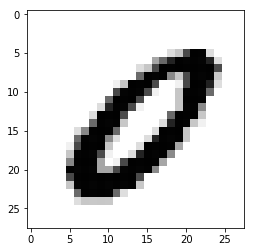

In [8]:
training_epochs = 150
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1),
             'cost = ', '{:.0f}'.format(avg_cost))
    print("Learning finished")
    
    print(accuracy.eval(session=sess, feed_dict={
        X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples -1)
    print(sess.run(tf.argmax(mnist.test.labels[r:r+1])))
    
    plt.imshow(
        mnist.test.images[r:r+1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest'
    )
    plt.show()